### Random Forest Classifer
- Random Forest is an ensemble learning algorithm that builds multiple decision trees and outputs the majority class for classification tasks.

- It reduces overfitting by averaging (voting) many decision trees trained on random subsets of data and features.

- It handles both numerical and categorical data without much preprocessing.

- Random Forest is robust to noise and outliers and can handle missing data effectively.

- It provides estimates of feature importance, useful for feature selection and interpretability.

- The model is highly accurate and versatile, suitable for a wide range of classification problems.

- It requires tuning of hyperparameters like number of trees, max depth, and max features for optimal performance.

- Random Forest can be computationally expensive and memory intensive when using many trees or large datasets.

- Predictions can be slower compared to simpler models because each input is evaluated by many trees.

- Interpretability is lower than single decision trees, often considered a "black-box" model.

- It is suitable when accuracy and robustness are prioritized over interpretability and speed.

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
# Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Road_Accident_Aalysis_project/Accidents_Cleaned.csv")
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Zipcode,Country,Timezone,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Duration_Minutes,Hour,DayOfWeek,Month,IsWeekend,IsDay
0,2,27.843691,-82.811668,0.00,Seminole,Pinellas,FL,33772,US,US/Eastern,...,0,0,1,0,29.816667,7,4,11,0,1
1,2,38.420071,-77.423340,0.00,Stafford,Stafford,VA,22554,US,US/Eastern,...,0,0,0,0,74.716667,7,2,12,0,1
2,2,42.319832,-71.226318,0.01,Waban,Middlesex,MA,02468-2321,US,US/Eastern,...,0,0,0,0,29.700000,7,0,12,0,1
3,2,39.034676,-84.599693,0.00,Erlanger,Kenton,KY,41018,US,US/Eastern,...,0,0,0,0,61.416667,6,0,2,0,0
4,2,43.010193,-83.689369,0.00,Flint,Genesee,MI,48502-1051,US,US/Eastern,...,0,0,1,0,81.016667,11,3,8,0,1


In [7]:
# Separate features and target variable
target = 'Severity'
X = df.drop(columns=[target])
y = df[target]

In [8]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

In [9]:
# Numeric transformer pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # fill missing
    ('scaler', StandardScaler())                     # scale numeric
])

# Categorical transformer pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for numeric and categorical
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [10]:
# Create the full pipeline with RandomForestClassifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=-1))
])

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
# Fit the model
clf.fit(X_train[:1000], y_train[:1000])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Start_Lat', 'Start_Lng',
                                                   'Distance(mi)',
                                                   'Temperature(F)',
                                                   'Wind_Chill(F)',
                                                   'Humidity(%)',
                                                   'Pressure(in)',
                                                   'Visibility(mi)',
                                                   'Wind_Speed(mph)',
                                                   'Precipitation(in)',
                                                   'Amenity', 'Bump',
                                                   'Crossing', 'Gi...
                                                   'IsWeekend', 'IsDay']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City', 'County', 'State',
                                                   'Zipcode', 'Country',
                                                   'Timezone', 'Airport_Code',
                                                   'Weather_Timestamp',
                                                   'Wind_Direction',
                                                   'Weather_Condition'])])),
                ('classifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

In [13]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6778710911527327

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.00      0.00      3817
           2       0.68      0.97      0.80    126980
           3       0.68      0.16      0.25     63548
           4       0.00      0.00      0.00      1173

    accuracy                           0.68    195518
   macro avg       0.59      0.28      0.26    195518
weighted avg       0.68      0.68      0.60    195518


Confusion Matrix:
 [[     2   3769     46      0]
 [     0 122564   4416      0]
 [     0  53578   9970      0]
 [     0    935    238      0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


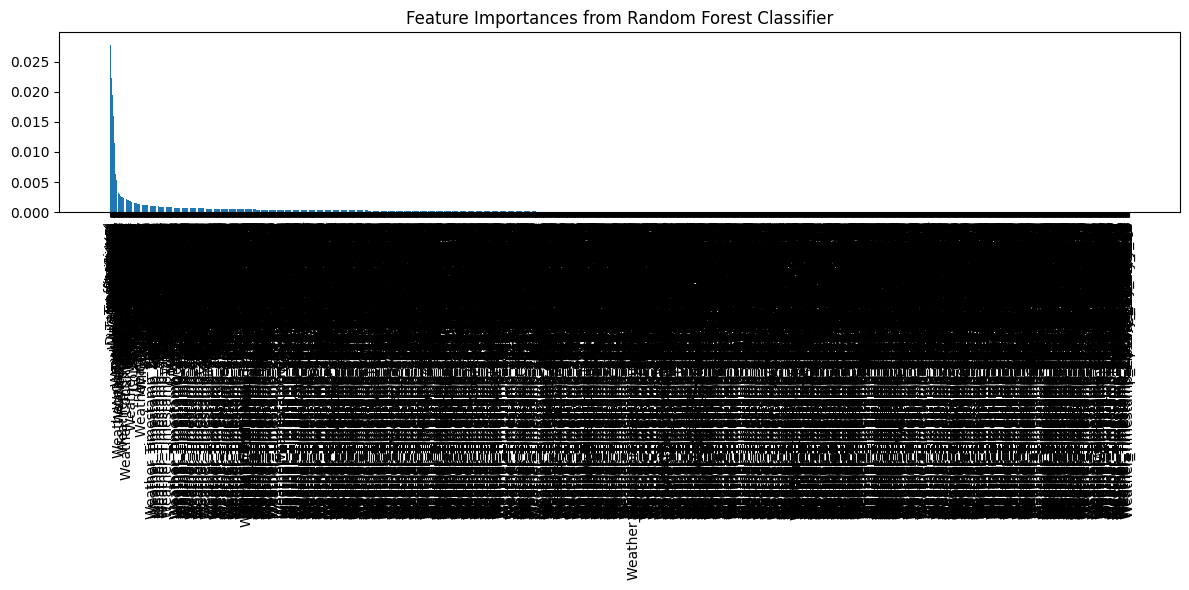

In [15]:
# Feature Importance extraction after preprocessing

## Extract feature names after OneHotEncoding
cat_features = clf.named_steps['preprocessor'].named_transformers_['cat']\
  .named_steps['onehot'].get_feature_names_out(categorical_cols)

all_features = np.concatenate([numerical_cols, cat_features])

importances = clf.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances from Random Forest Classifier")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), all_features[indices], rotation=90)
plt.tight_layout()
plt.show()